In [1]:
# Import libraries.

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
plt.style.use('seaborn-v0_8-dark-palette')

In [8]:
# Import data

In [9]:
db = pd.read_csv('facebook_ads_data.csv')

In [10]:
# Clean data

In [11]:
db['ad_date'] = pd.to_datetime(db['ad_date'], errors='coerce')
db21 = db['ad_date'].dt.year == 2021

In [12]:
# Data for 2021.

In [13]:
gdb = db[db21].groupby('ad_date').sum()
gdb

,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
ad_date,,,,,,,,,
2021-01-01,BrandDiscounts,0.39,353,0,0.59,0.00,1.10,0.000000,1.512821
2021-01-02,Discounts,28.00,10775,130,26.27,0.22,2.60,0.012065,0.938214
2021-01-05,ElectronicsPromos,102.54,32422,304,155.38,0.72,5.68,0.016389,3.499648
2021-01-06,BrandElectronicsLookalikeNew items,285.92,103024,1303,416.46,3.48,7.39,0.038111,5.590437
2021-01-07,Crazy discountsElectronicsLookalikeNew itemsWh...,692.77,110488,2240,990.51,1.65,32.95,0.090351,6.470629
...,...,...,...,...,...,...,...,...,...
2021-12-08,BrandElectronicsLookalikeNew itemsPromosWholesale,634.59,230870,2496,988.36,2.11,27.54,0.096529,8.992620
2021-12-09,Crazy discountsElectronicsLookalikePromosWhole...,402.41,201682,1012,492.46,2.40,11.24,0.055603,6.070499
2021-12-10,Crazy discountsElectronicsLookalikeWholesale,471.86,125135,1103,568.68,2.27,15.44,0.036110,4.685500


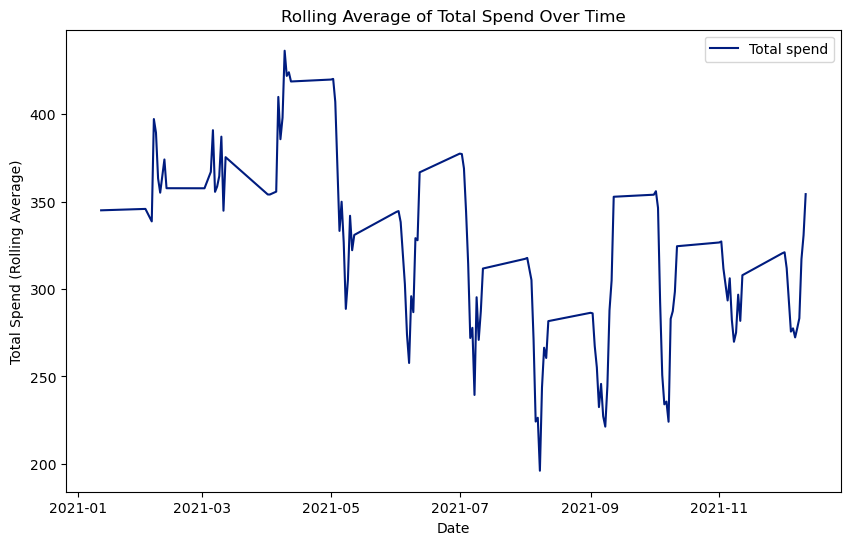

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(gdb.index, gdb['total_spend'].rolling(10).mean(), label='Total spend')
plt.xlabel('Date')
plt.ylabel('Total Spend (Rolling Average)')
plt.title('Rolling Average of Total Spend Over Time')
plt.legend()
plt.show()

In [15]:
# 1a. total_spend for the year of 2021.

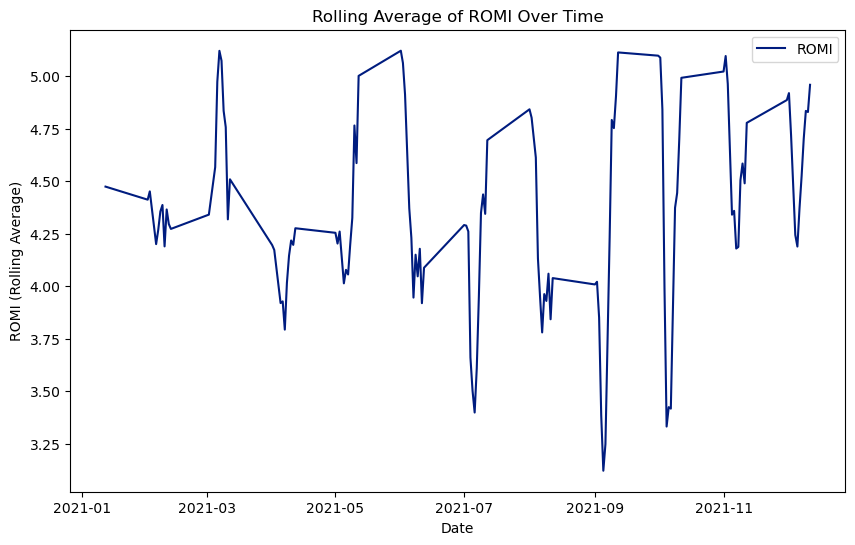

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(gdb.index, gdb['romi'].rolling(10).mean(), label='ROMI')
plt.xlabel('Date')
plt.ylabel('ROMI (Rolling Average)')
plt.title('Rolling Average of ROMI Over Time')
plt.legend()
plt.show()

In [17]:
# 1b. romi for the year of 2021.

In [18]:
sdb = db.groupby('campaign_name').sum(numeric_only=True)

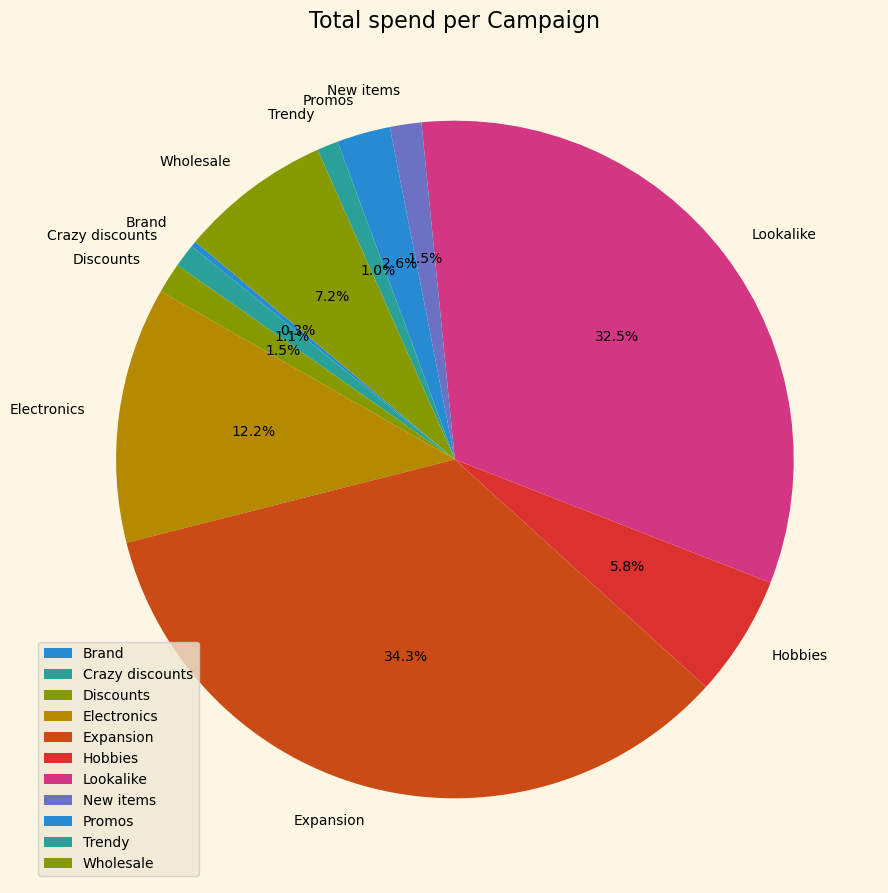

In [19]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(18, 11))
plt.pie(sdb['total_spend'], labels=sdb.index, autopct='%1.1f%%', startangle=140)
plt.title('Total spend per Campaign')
plt.legend(loc='lower left')
plt.show()

In [20]:
# 2a. total_spend per campaign.

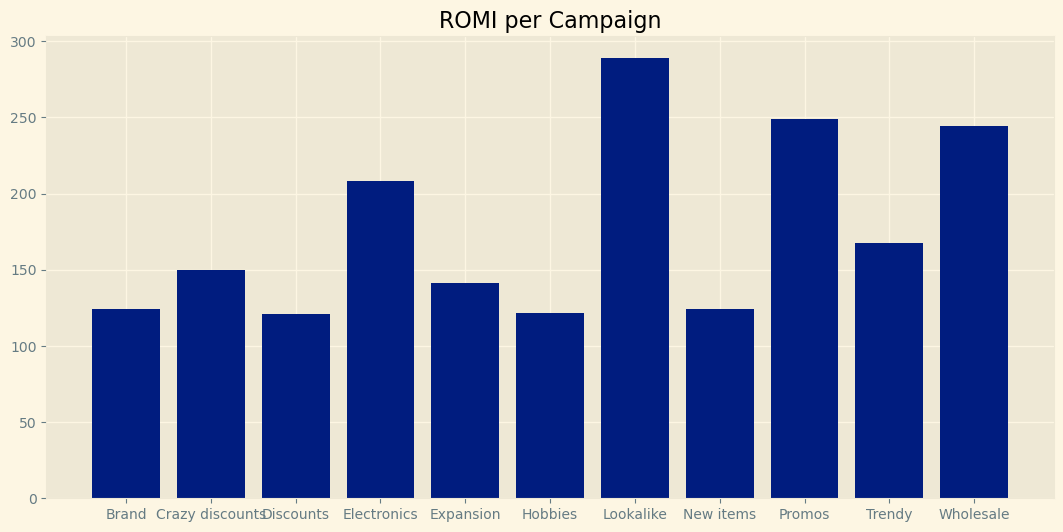

In [21]:
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(13, 6))
plt.bar(sdb.index, sdb['romi'])
plt.title('ROMI per Campaign')
plt.show()

In [22]:
# 2b. romi per campaign.

<Axes: title={'center': 'romi'}, xlabel='campaign_name'>

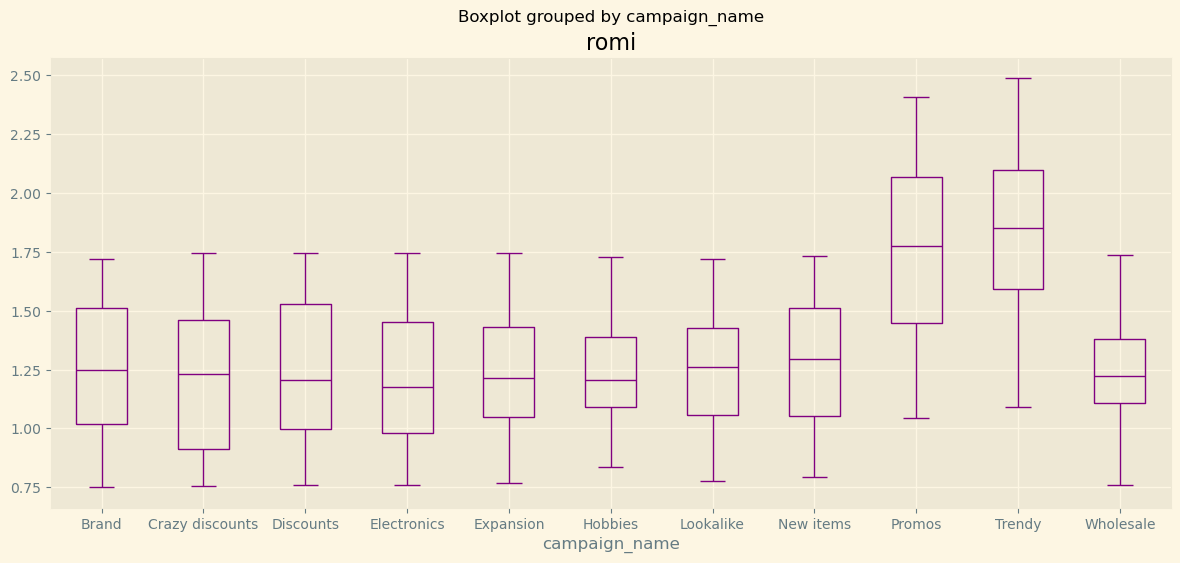

In [23]:
db.boxplot('romi', by= 'campaign_name', figsize = (14,6), color = 'purple')

In [24]:
# 3. romi per campaign - box plot.

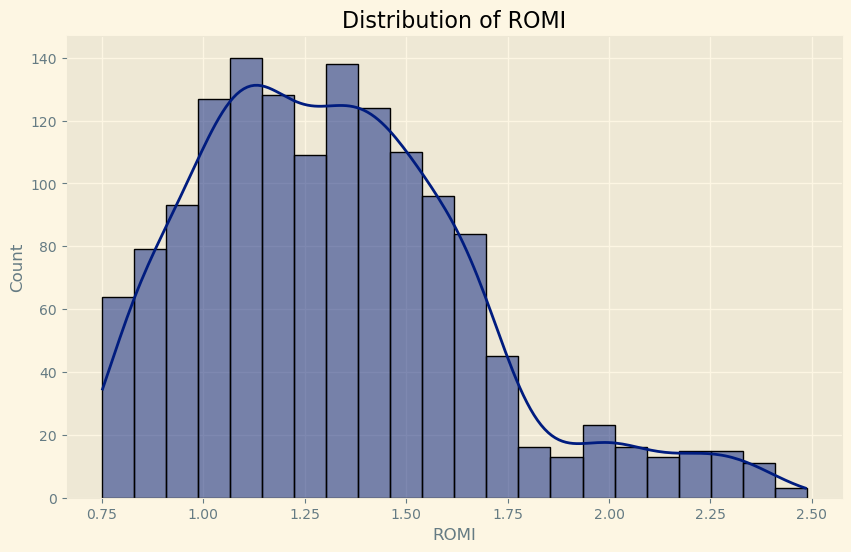

In [25]:
dims = (10, 6)
plt.figure(figsize=dims)
sns.histplot(db['romi'], kde=True)
plt.title('Distribution of ROMI')
plt.xlabel('ROMI')
plt.show()

In [26]:
# 4. romi histogram.

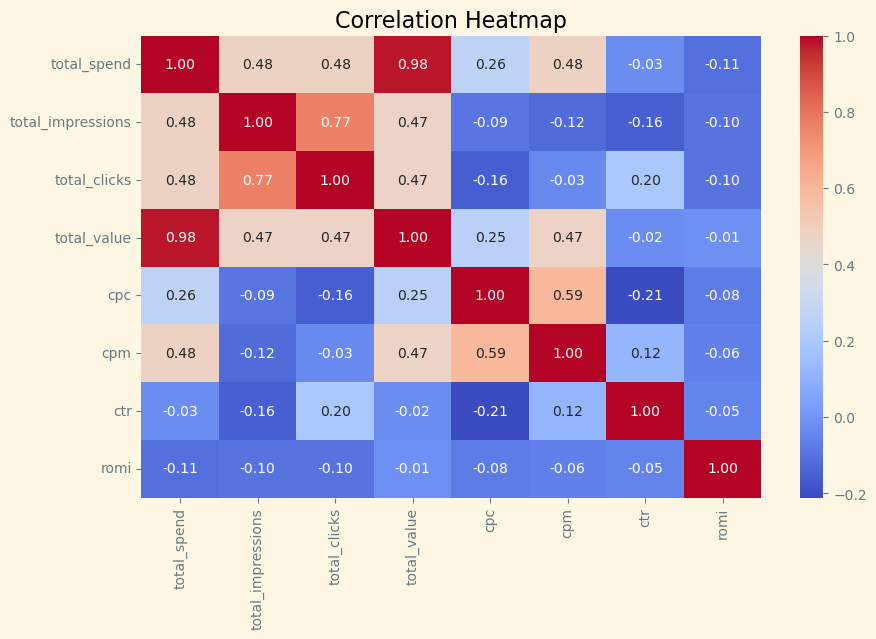

In [27]:
numeric_db = db.select_dtypes(include='number')
correlation_matrix = numeric_db.corr()
dims = (10, 6)
plt.figure(figsize=dims)
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# 5. Correlation Heatmap. 
# Highest correlation 'total_spend' - 'total_value', lowest correlation 'cpc' - 'ctr'
# 'total_value' correlates with impressions, clicks and spending. Therefore visibility increases value.

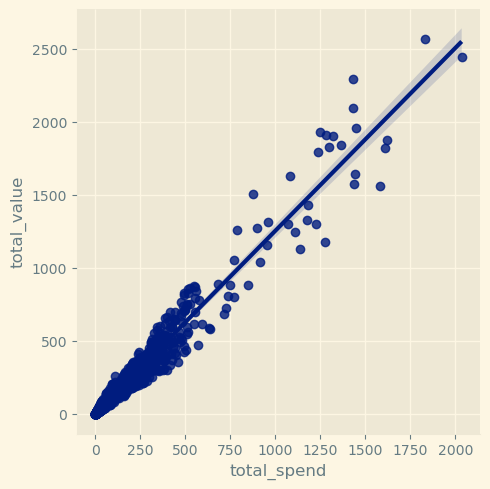

In [29]:
sns.lmplot(db, x='total_spend', y='total_value')